# Week-3 Homework 
This notebook has been created to answer homework questions during week-3 of ML zoomcamp.

# Dataset
California housing Price data from Kaggle

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -O 03_data_housing.csv

--2022-09-26 14:02:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘03_data_housing.csv’

03_data_housing.csv 100%[===================>]   1.36M  --.-KB/s    in 0.08s   

2022-09-26 14:02:18 (16.8 MB/s) - ‘03_data_housing.csv’ saved [1423529/1423529]



***

# Import Modules

In [366]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mutual_info_score, mean_squared_error 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

***

# Features

In [17]:
df = pd.read_csv('03_data_homework.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [19]:
df.head(3).T

,0,1,2
longitude,-122.23,-122.22,-122.24
latitude,37.88,37.86,37.85
housing_median_age,41.0,21.0,52.0
total_rooms,880.0,7099.0,1467.0
total_bedrooms,129.0,1106.0,190.0
population,322.0,2401.0,496.0
households,126.0,1138.0,177.0
median_income,8.3252,8.3014,7.2574
median_house_value,452600.0,358500.0,352100.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY


In [20]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

***

# Data Prep

## Missing values

In [185]:
df_copy = df.copy()

In [186]:
# missing vlaues 
df_copy.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [187]:
df_copy.total_bedrooms = df_copy.total_bedrooms.fillna(0.0)

In [188]:
df_copy.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## New columns: 
- rooms_per_household
- bedrooms_per_room
- population_per_household

In [189]:
df_copy['rooms_per_household'] = df_copy['total_rooms'] / df_copy['households']
df_copy['bedrooms_per_room'] = df_copy['total_bedrooms'] / df_copy['total_rooms']
df_copy['population_per_household'] = df_copy['population'] / df_copy['households']

In [190]:
df_copy.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


***

# Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [191]:
df_copy['ocean_proximity'].value_counts().sort_values(ascending=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

***

# Question 2

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

In [192]:
df_copy.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [193]:
features_num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [194]:
features_cat = ['ocean_proximity']

In [195]:
df_copy[features_num].corrwith(df_copy.median_house_value)

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049148
population                 -0.024650
households                  0.065843
median_income               0.688075
rooms_per_household         0.151948
bedrooms_per_room          -0.238759
population_per_household   -0.023737
dtype: float64

In [196]:
corr_matrix = df_copy[features_num].corr() 
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.084836,-0.104112,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047


In [197]:
corr_matrix[corr_matrix.abs() > 0.95]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,NaN,1.000000,NaN,0.966507,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
households,NaN,NaN,NaN,NaN,0.966507,NaN,1.000000,NaN,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
rooms_per_household,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
bedrooms_per_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


## Make median_house_value binary

In [198]:
mean_house_price =  df_copy['median_house_value'].mean()
mean_house_price

206855.81690891474

In [199]:
def convert_house_price_to_binary(x):
    return 1 if x > mean_house_price else 0

In [200]:
df_copy['median_house_value_binary'] = df_copy['median_house_value'].apply(convert_house_price_to_binary)

## Split the data 

In [201]:
df_train_full, df_test = train_test_split(df_copy, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train.shape, df_val.shape, df_test.shape

((12384, 14), (4128, 14), (4128, 14))

In [202]:
# Get y variables 
y_train = df_train.median_house_value_binary.values
y_val   = df_val.median_house_value_binary.values
y_test  = df_test.median_house_value_binary.values

In [203]:
# Drop the churn feature from df_train, df_val and df_test
del df_train['median_house_value']
del df_train['median_house_value_binary']
del df_val['median_house_value']
del df_val['median_house_value_binary']
del df_test['median_house_value']
del df_test['median_house_value_binary']

In [204]:
df_train.shape, df_val.shape, df_test.shape

((12384, 12), (4128, 12), (4128, 12))

***

# Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

In [205]:
df_train.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [206]:
round(mutual_info_score(df_train.ocean_proximity, y_train), 2)

0.1

***

# Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [120]:
# Numericals 
X_train_num = df_train[features_num].values

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_num)

In [121]:
df_train.latitude.values

array([34.63, 34.69, 33.78, ..., 33.9 , 36.78, 34.02])

In [122]:
X_train_num[:, 0]

array([ 0.69282843,  1.33076719,  0.65295726, ...,  0.60311829,
       -0.10957892,  0.97192664])

In [125]:
# Categoircals

X_train_cat = df_train[features_cat].values

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(X_train_cat)

In [126]:
df_train.ocean_proximity.values

array(['INLAND', 'INLAND', 'NEAR OCEAN', ..., '<1H OCEAN', 'INLAND',
       'INLAND'], dtype=object)

In [128]:
X_train_cat

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [129]:
ohe.get_feature_names()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

## Combine two matrices into one - X_train 

In [130]:
# X_train = np.column_stack([X_train_num, X_train_cat])

In [131]:
# model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [132]:
# model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

## Check accuracy 

In [133]:
# X_val_num = df_val[features_num].values
# X_val_num = scaler.transform(X_val_num)

# X_val_cat = ohe.transform(df_val[features_cat].values)

# X_val = np.column_stack([X_val_num, X_val_cat])

In [136]:
# y_pred = model.predict_proba(X_val)[:, 1]
# round(accuracy_score(y_val, y_pred >= 0.5), 2)

0.84

# Functions User-Defined

In [243]:
def split_datasets(df):
    df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
    return df_train, df_val, df_test

In [244]:
def dataset_into_features_target(df, feature_target):
    y = df[feature_target].values
    del df[feature_target]
    return df, y 

In [207]:
def remove_from_list(list_features, val):
    if val in list_features:
        list_features.remove(val)
    return list_features

In [208]:
def prepare_X_train(df, drop_feature=''):
    
    # Locals
    df_local = df.copy()
    features_num_local = features_num.copy()
    features_cat_local = features_cat.copy()
    
    # Drop feature if present in list
    remove_from_list(features_num_local, drop_feature)
    
    # Numericals 
    X_num = df_local[features_num_local].values
    scaler = StandardScaler()
    X_num = scaler.fit_transform(X_num)
    
    
    # Categoircals
    X_cat = df_local[features_cat_local].values
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_cat = ohe.fit_transform(X_cat)
    
    # Combine num, cat
    X_train = np.column_stack([X_num, X_cat])
    
    return X_train

In [222]:
X_train = prepare_X(df_train, drop_feature='')

model = LogisticRegression(solver="liblinear", 
                           C=1.0, 
                           max_iter=1000, 
                           random_state=42)
model.fit(X_train, y_train)

X_val = prepare_X(df_val, drop_feature='')

y_pred = model.predict_proba(X_val)[:, 1]
round(accuracy_score(y_val, y_pred >= 0.5), 6)

0.839874

***

# Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference? 

In [139]:
# total_roooms
mutual_info_score(df_train_full.median_house_value_binary, df_train_full.total_rooms)

0.2249744677564978

In [220]:
X_train = prepare_X(df_train, drop_feature='total_rooms')

model_1 = LogisticRegression(solver="liblinear", 
                           C=1.0, 
                           max_iter=1000, 
                           random_state=42)
model_1.fit(X_train, y_train)

X_val = prepare_X(df_val, drop_feature='total_rooms')

y_pred = model_1.predict_proba(X_val)[:, 1]
round(accuracy_score(y_val, y_pred >= 0.5), 6)

0.84157

***

In [143]:
# total_bedrooms
mutual_info_score(df_train_full.median_house_value_binary, df_train_full.total_bedrooms)

0.07142400788410448

In [219]:
X_train = prepare_X(df_train, drop_feature='total_bedrooms')

model_2 = LogisticRegression(solver="liblinear", 
                           C=1.0, 
                           max_iter=1000, 
                           random_state=42)
model_2.fit(X_train, y_train)

X_val = prepare_X(df_val, drop_feature='total_bedrooms')

y_pred = model_2.predict_proba(X_val)[:, 1]
round(accuracy_score(y_val, y_pred >= 0.5), 6)

0.841328

In [142]:
# population
mutual_info_score(df_train_full.median_house_value_binary, df_train_full.population)

0.13689524003374332

In [223]:
X_train = prepare_X(df_train, drop_feature='population')

model_3 = LogisticRegression(solver="liblinear", 
                           C=1.0, 
                           max_iter=1000, 
                           random_state=42)
model_3.fit(X_train, y_train)

X_val = prepare_X(df_val, drop_feature='population')

y_pred = model_3.predict_proba(X_val)[:, 1]
round(accuracy_score(y_val, y_pred >= 0.5), 6)

0.837452

In [141]:
# hosueholds
mutual_info_score(df_train_full.median_house_value_binary, df_train_full.households)

0.06615187233399311

In [224]:
X_train = prepare_X(df_train, drop_feature='households')

model_4 = LogisticRegression(solver="liblinear", 
                           C=1.0, 
                           max_iter=1000, 
                           random_state=42)
model_4.fit(X_train, y_train)

X_val = prepare_X(df_val, drop_feature='households')

y_pred = model_4.predict_proba(X_val)[:, 1]
round(accuracy_score(y_val, y_pred >= 0.5), 6)

0.836483

In [230]:
df_accuracy = pd.DataFrame()

df_accuracy['models'] = ['model_total_rooms', 
                         'model_total_bedrooms', 
                         'model_population', 
                         'model_households']

df_accuracy['accuracy'] = [0.84157, 
                           0.841328,
                           0.837452,
                           0.836483                          
                          ]

df_accuracy['base_accuracy'] = 4*[0.839874]

df_accuracy

,models,accuracy,base_accuracy
0,model_total_rooms,0.841570,0.839874
1,model_total_bedrooms,0.841328,0.839874
2,model_population,0.837452,0.839874
3,model_households,0.836483,0.839874


In [231]:
df_accuracy['diff'] = df_accuracy['accuracy'] - df_accuracy['base_accuracy']
df_accuracy

,models,accuracy,base_accuracy,diff
0,model_total_rooms,0.841570,0.839874,0.001696
1,model_total_bedrooms,0.841328,0.839874,0.001454
2,model_population,0.837452,0.839874,-0.002422
3,model_households,0.836483,0.839874,-0.003391


In [235]:
df_accuracy['diff'].abs().min()

0.0014539999999999553

***

# Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [348]:
df_copy2 = df.copy()
df_copy2 = df_copy2.fillna(0.0)

In [349]:
df_copy2.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

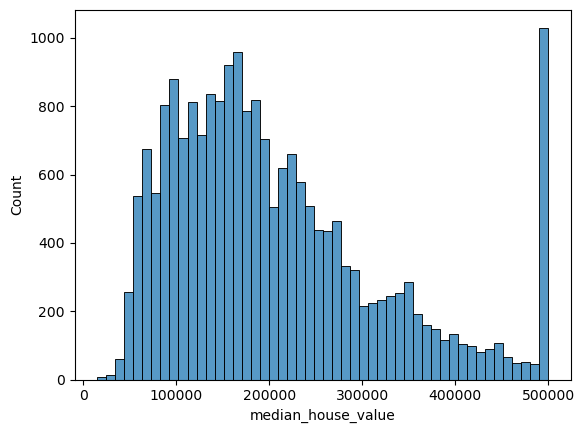

In [350]:
sns.histplot(df_copy2.median_house_value, bins=50)

In [351]:
df_copy2['median_house_value_log'] = df_copy2['median_house_value'].apply(np.log)

<AxesSubplot:xlabel='median_house_value_log', ylabel='Count'>

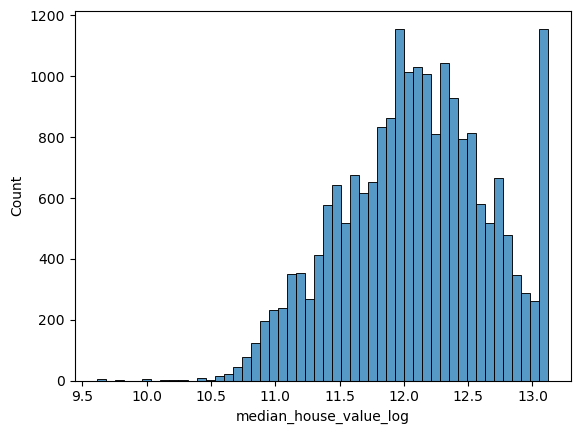

In [352]:
sns.histplot(df_copy2.median_house_value_log, bins=50)

In [353]:
del df_copy2['median_house_value']

In [354]:
# convert cat to num
df_temp  = pd.get_dummies(df_copy2.ocean_proximity)
df_copy22 = pd.concat([df_copy2, df_temp], axis=1)
del df_copy22['ocean_proximity']

In [355]:
df_train2, df_val2, df_test2 = split_datasets(df_copy22)

In [356]:
len(df_train2), len(df_val2), len(df_test2)

(12384, 4128, 4128)

In [357]:
df_train3, y_train3 = dataset_into_features_target(df_train2, 
                                                 feature_target='median_house_value_log')

df_val3, y_val3 = dataset_into_features_target(df_val2, 
                                                 feature_target='median_house_value_log')


df_test3, y_test3 = dataset_into_features_target(df_test2, 
                                                 feature_target='median_house_value_log')

In [358]:
df_test3.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
<1H OCEAN               uint8
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

In [359]:
df_copy22.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value_log    0
<1H OCEAN                 0
INLAND                    0
ISLAND                    0
NEAR BAY                  0
NEAR OCEAN                0
dtype: int64

In [360]:
X_train3 = df_train3.values
X_val3   = df_val3.values
X_test3  = df_test3.values

In [374]:
list_a = [0, 0.01, 0.1, 1, 10]
list_rsme = []

for a in list_a:
    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    
    model_ridge.fit(X_train3, y_train3)
    
    y_pred = model_ridge.predict(X_val3)
    
    rsme = mean_squared_error(y_val3, y_pred, squared=True)
    list_rsme.append(rsme)
    
    print(a, rsme)

0 0.28207543797717466
0.01 0.2820754379981901
0.1 0.28207543819784825
1 0.28207544020492864
10 0.28207546024419167


In [377]:
df_a = pd.DataFrame({'a':list_a, 'rsme':list_rsme})

In [380]:
df_a[df_a.rsme == df_a.rsme.min()]

,a,rsme
0,0.0,0.282075


***